In [9]:
from parseTrackletXML import *
import cv2
import os
import matplotlib.pyplot as plt
from kitti_util import *
from collections import defaultdict

In [2]:
calib = Calibration("/home/yzy/Downloads/2011_09_26/2011_09_26_drive_0023_sync", from_video=True)


In [37]:
tracklet_file = "/home/yzy/Downloads/2011_09_26/2011_09_26_drive_0023_sync/tracklet_labels.xml"
tracklets = parseXML(trackletFile=tracklet_file)

frame_dict = defaultdict(list)
corners = None
for iTracklet, tracklet in enumerate(tracklets):
    # print('tracklet {0: 3d}: {1}'.format(iTracklet, tracklet))

    h,w,l = tracklet.size
    trackletBox = np.array([ # in velodyne coordinates around zero point and without orientation yet\
        [-l/2, -l/2,  l/2, l/2, -l/2, -l/2,  l/2, l/2], \
        [ w/2, -w/2, -w/2, w/2,  w/2, -w/2, -w/2, w/2], \
        [ 0.0,  0.0,  0.0, 0.0,    h,     h,   h,   h]])

    for translation, rotation, state, occlusion, truncation, amtOcclusion, amtBorders, absoluteFrameNumber \
            in tracklet:
        if truncation not in (TRUNC_IN_IMAGE, TRUNC_TRUNCATED):
            continue
        # re-create 3D bounding box in velodyne coordinate system
        yaw = rotation[2]   # other rotations are 0 in all xml files I checked
        assert np.abs(rotation[:2]).sum() == 0, 'object rotations other than yaw given!'
        rotMat = np.array([\
          [np.cos(yaw), -np.sin(yaw), 0.0], \
          [np.sin(yaw),  np.cos(yaw), 0.0], \
          [        0.0,          0.0, 1.0]])
        cornerPosInVelo = np.dot(rotMat, trackletBox) + np.tile(translation, (8,1)).T

        # calc yaw as seen from the camera (i.e. 0 degree = facing away from cam), as opposed to
        #   car-centered yaw (i.e. 0 degree = same orientation as car).
        #   makes quite a difference for objects in periphery!
        # Result is in [0, 2pi]
        x, y, z = translation
        yawVisual = ( yaw - np.arctan2(y, x) ) % (2.*np.pi)
        frame_dict[absoluteFrameNumber].append(cornerPosInVelo.T)
        #if corners is None:
        #    corners = calib.project_velo_to_image(cornerPosInVelo.T)
        #else:
        #    corners = np.vstack([corners, calib.project_velo_to_image(cornerPosInVelo.T)])

parsing tracklet file /home/yzy/Downloads/2011_09_26/2011_09_26_drive_0023_sync/tracklet_labels.xml
file contains 167 tracklets
loaded 167 tracklets


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


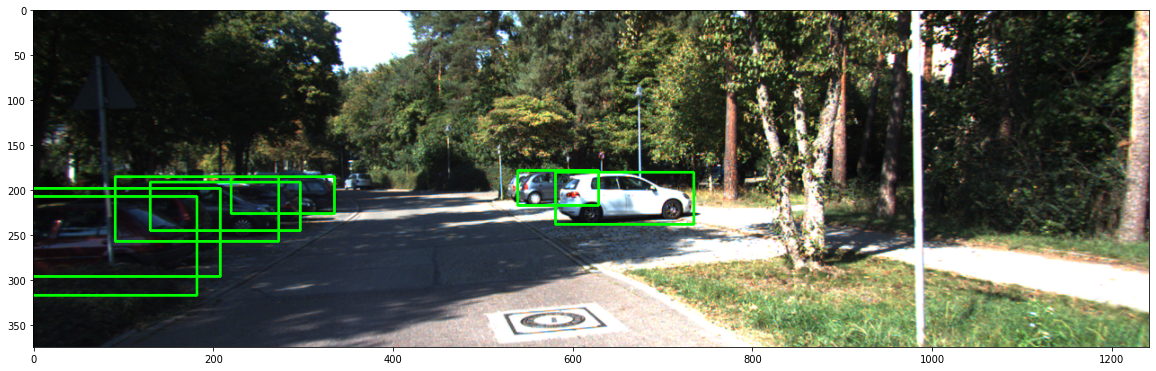

In [36]:
# load image
fig = plt.figure(figsize=(20, 10))
img = plt.imread("/home/yzy/Downloads/2011_09_26/2011_09_26_drive_0023_sync/image_02/data/0000000000.png")
for i in range(0, corners.shape[0], 8):
    pt1 = np.min(corners[i:i+8, :], axis=0).astype(int)
    pt2 = np.max(corners[i:i+8, :], axis=0).astype(int)
    img = cv2.rectangle(img, tuple(pt1), tuple(pt2), (0,255,0), int(2))
    # img = draw_projected_box3d(img, corners[i:i+8, :])
#for p in corners.astype(int):
    #img = cv2.circle(img, tuple(p), radius=5, color=(255, 0, 0))
plt.imshow(img)

In [38]:
frame_dict.keys()


dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219,